# Kaggle Carvana competition

## Using convnet


verify RLE

In [37]:

import time

import numpy as np
import pandas as pd
from scipy import ndimage

from matplotlib import pyplot as plt

PROJECT_PATH = '..'
INPUT_PATH = PROJECT_PATH + '/input'

TRAIN_MASKS_CSV_PATH = INPUT_PATH + '/train_masks.csv'
TRAIN_MASKS_PATH = INPUT_PATH + '/train_masks'## Step 0: Load The Data

In [38]:
def read_train_masks():
    global train_masks
    train_masks = pd.read_csv(TRAIN_MASKS_CSV_PATH)
    print(train_masks.head())


read_train_masks()



FileNotFoundError: File b'../input/train_masks.csv' does not exist

In [5]:
#import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = '../data/train/'
#validation_file= './traffic-signs-data/valid.p'
#testing_file = './traffic-signs-data/test.p'

#with open(training_file, mode='rb') as f:
#    train = pickle.load(f)
'''
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
'''    
    
#X_train, y_train = train['features'], train['labels']
'''
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
'''

"\nX_valid, y_valid = valid['features'], valid['labels']\nX_test, y_test = test['features'], test['labels']\n"

5088
train_x:  ['00087a6bd4dc_01.jpg', '00087a6bd4dc_02.jpg', '00087a6bd4dc_03.jpg', '00087a6bd4dc_04.jpg', '00087a6bd4dc_05.jpg']
5088
train_y:  ['00087a6bd4dc_01_mask.gif', '00087a6bd4dc_02_mask.gif', '00087a6bd4dc_03_mask.gif', '00087a6bd4dc_04_mask.gif', '00087a6bd4dc_05_mask.gif']


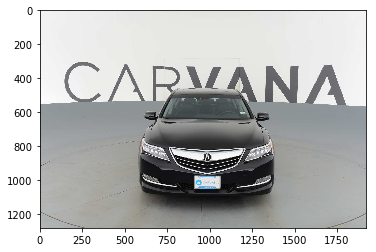

'\nimg = cv2.imread(train_x[0])\n#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n#gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)\nfig = plt.imshow(img)\nplt.show()\n'

In [34]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_x_dirname = "../data/train/"
train_y_dirname = "../data/train_masks/"
train_x = os.listdir(train_x_dirname)
print(len(train_x))
print('train_x: ', train_x[0:5] )

train_y = os.listdir(train_y_dirname)
print(len(train_y))
print('train_y: ', train_y[0:5] )



image = mpimg.imread(train_x_dirname + train_x[0])
plt.imshow(image)
plt.show()
'''
image = mpimg.imread(train_y_dirname + train_y[0])
plt.imshow(image)
plt.show()
'''
'''
img = cv2.imread(train_x[0])
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
fig = plt.imshow(img)
plt.show()
'''


In [35]:
print(type(image))
print(image.shape)
print(image[0][0])
print(image[0][1])





<class 'numpy.ndarray'>
(1280, 1918, 3)
[244 245 240]
[244 245 240]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
print(type(train) )
print('train keys:', train.keys() )
#coords = train['coords']
#print(coords[0])
#print(coords[2])

<class 'dict'>
train keys: dict_keys(['features', 'sizes', 'coords', 'labels'])


In [3]:
len(X_train)
X_train[0].shape
print(len(y_train) ) 
print(len(y_test) ) 
print(len(y_valid) ) 
print('set of y ',  set(y_train) )
print('len of set y: ',  len(set(y_train) ) )

34799
12630
4410
set of y  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}
len of set y:  43


In [4]:
import csv
import pandas as pd
from IPython.display import display

# get the sign name mapping:
signnames = 'signnames.csv'
display(pd.read_csv(signnames).head())

sign_name_mapping = []
with open(signnames, 'r') as f_read:
    for index, row in enumerate(csv.reader(f_read) ):
#        print(index)
#        print(row)
        if 0 == index:
            pass
        else:
            sign_name_mapping.append(row)

print(sign_name_mapping[0])
print(sign_name_mapping[5])
print(sign_name_mapping[42])
print('sign_name_mapping:', sign_name_mapping)
#print(sign_name_mapping[44])


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


['0', 'Speed limit (20km/h)']
['1', 'Speed limit (30km/h)']
['5', 'Speed limit (80km/h)']
['42', 'End of no passing by vehicles over 3.5 metric tons']
sign_name_mapping: [['0', 'Speed limit (20km/h)'], ['1', 'Speed limit (30km/h)'], ['2', 'Speed limit (50km/h)'], ['3', 'Speed limit (60km/h)'], ['4', 'Speed limit (70km/h)'], ['5', 'Speed limit (80km/h)'], ['6', 'End of speed limit (80km/h)'], ['7', 'Speed limit (100km/h)'], ['8', 'Speed limit (120km/h)'], ['9', 'No passing'], ['10', 'No passing for vehicles over 3.5 metric tons'], ['11', 'Right-of-way at the next intersection'], ['12', 'Priority road'], ['13', 'Yield'], ['14', 'Stop'], ['15', 'No vehicles'], ['16', 'Vehicles over 3.5 metric tons prohibited'], ['17', 'No entry'], ['18', 'General caution'], ['19', 'Dangerous curve to the left'], ['20', 'Dangerous curve to the right'], ['21', 'Double curve'], ['22', 'Bumpy road'], ['23', 'Slippery road'], ['24', 'Road narrows on the right'], ['25', 'Road work'], ['26', 'Traffic signals'], 

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train) ) 


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

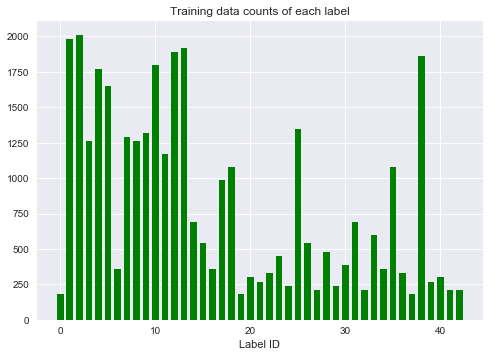

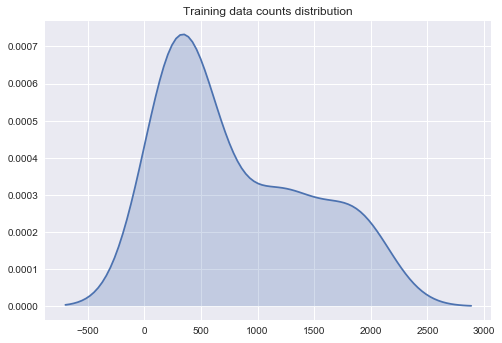

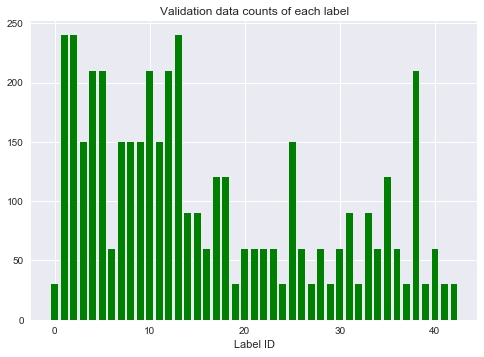

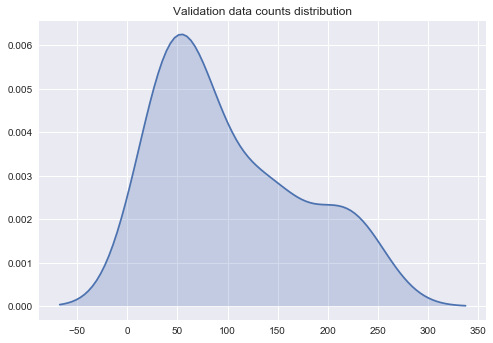

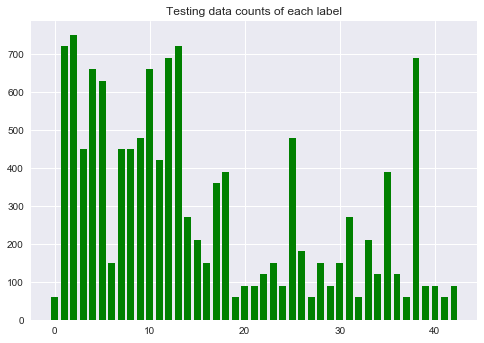

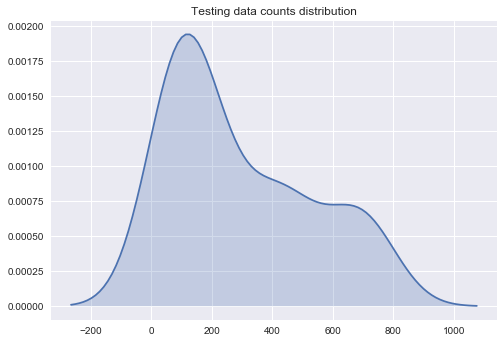

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

import seaborn as sns

# count the numbers of different label:
unique_train, counts_train = numpy.unique(y_train, return_counts = True)
#print('counts_train:', counts_train)
#print(len(y_train))

plt.bar(range(len(counts_train)), counts_train, width = 0.7, color="green")
#plt.grid()
plt.xlabel('Label ID')
plt.title('Training data counts of each label')
plt.show()

sns.kdeplot(counts_train, shade=True);
plt.title('Training data counts distribution')
plt.show()

unique_valid, counts_valid = numpy.unique(y_valid, return_counts = True)
#print('counts_valid:', counts_valid)
#print(len(y_valid))

plt.bar(range(len(counts_valid)), counts_valid, width = 0.7, color="green")
plt.xlabel('Label ID')
plt.title('Validation data counts of each label')
plt.show()

sns.kdeplot(counts_valid, shade=True);
plt.title('Validation data counts distribution')
plt.show()

unique_test, counts_test = numpy.unique(y_test, return_counts = True)
#print('counts_test:', counts_test)
#print(len(y_valid))

plt.bar(range(len(counts_test)), counts_test, width = 0.7, color="green")
#lt.xlabel('Label ID')
plt.title('Testing data counts of each label')
plt.show()

sns.kdeplot(counts_test, shade=True);
plt.title('Testing data counts distribution')
plt.show()

#seems the distribution are all right skewed.


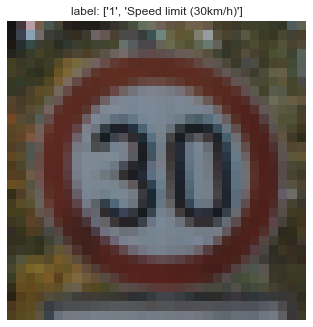

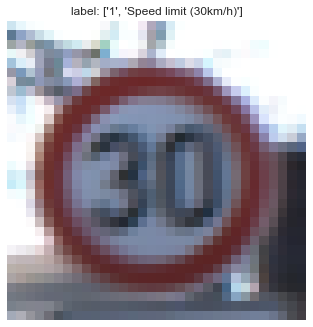

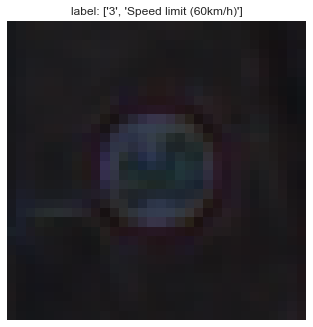

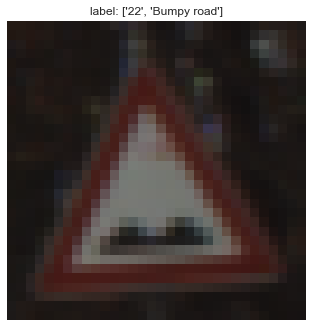

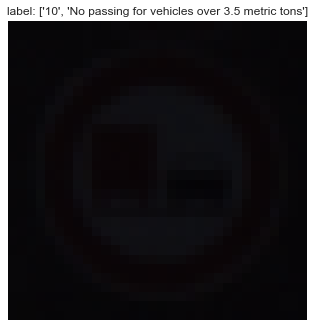

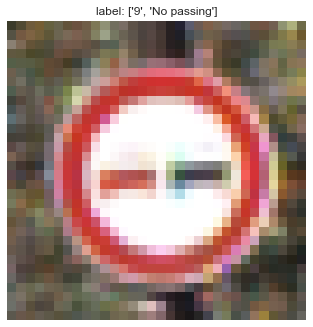

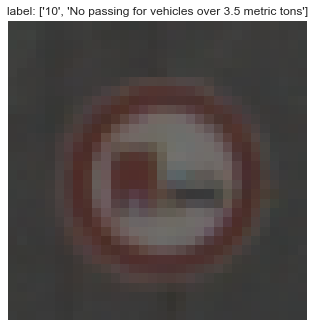

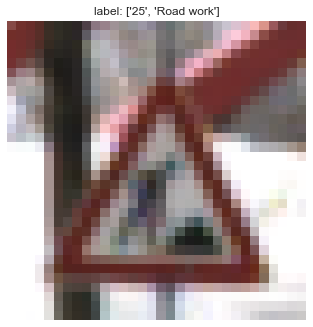

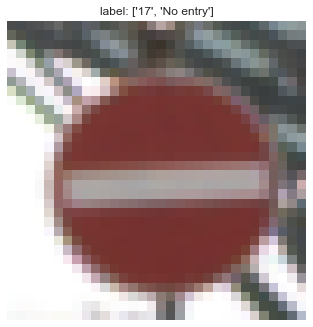

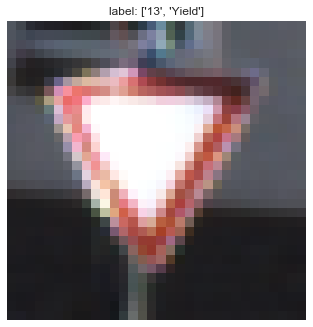

In [7]:
# Show 10 different kind of images and label, from 0, to 34799(n_train), 
# to make sure I load these images right(at least not too wrong) and I don't have color blindness.
import random
random_sample_ID = random.sample(range(n_train), 10)

for iter in random_sample_ID:
    title = 'index: ' + str(iter)
#    print(sign_name_mapping[y_train[iter]][1] )
    xlabel = 'label: ' + str( sign_name_mapping[y_train[iter]] )
#    print('xlabel: ', xlabel)
#    plt.figure()
    fig = plt.imshow(X_train[iter])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
#    plt.xlabel(xlabel)
    plt.title(xlabel)
    plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

(34799, 32, 32, 3)


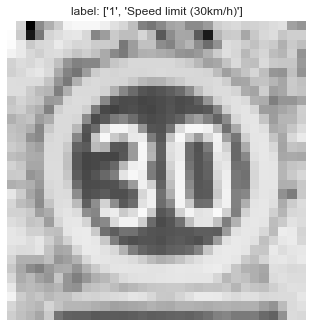

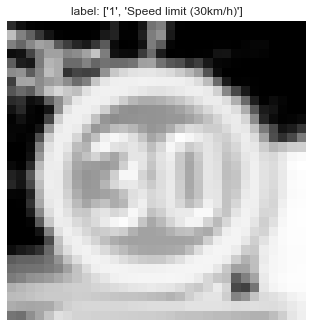

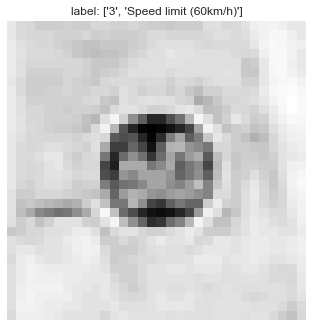

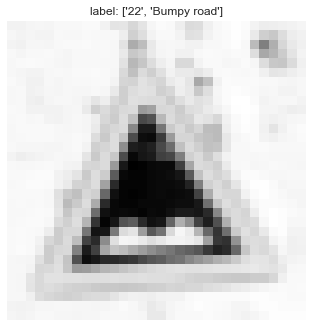

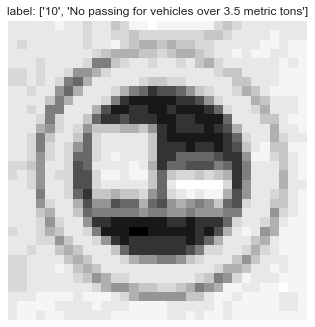

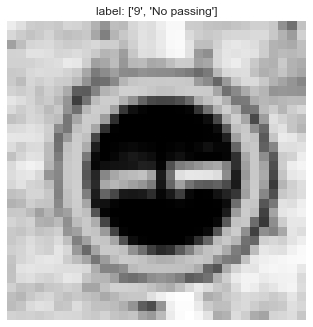

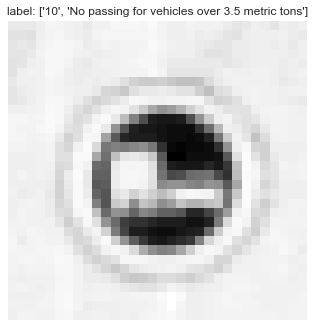

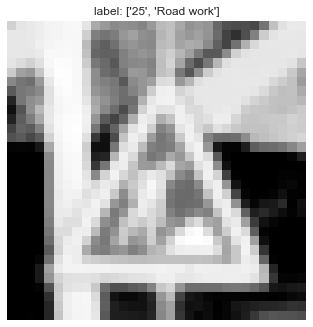

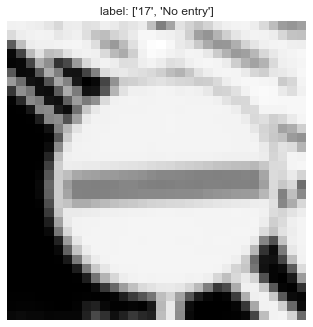

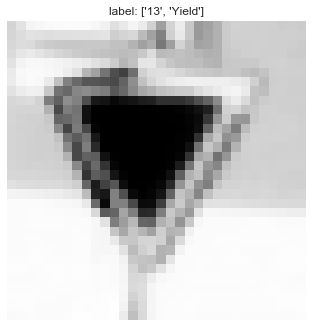

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
import numpy as np

print(X_train.shape)
X_train_gray = np.ndarray( shape=(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) )
X_valid_gray = np.ndarray( shape=(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1) )
X_test_gray = np.ndarray( shape=(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1) )

for iter in range(n_train):
    grayout = cv2.cvtColor(X_train[iter], cv2.COLOR_RGB2GRAY)
    X_train_gray[iter] = grayout.reshape((32,32,1))
    
for iter in range(n_validation):
    grayout = cv2.cvtColor(X_valid[iter], cv2.COLOR_RGB2GRAY)
    X_valid_gray[iter] = grayout.reshape((32,32,1))
     
for iter in range(n_test):
    grayout = cv2.cvtColor(X_test[iter], cv2.COLOR_RGB2GRAY)
    X_test_gray[iter] = grayout.reshape((32,32,1))

X_train_norm = (X_train_gray - 128.0) / 128.0
X_valid_norm = (X_valid_gray - 128.0) / 128.0
X_test_norm = (X_test_gray - 128.0) / 128.0

'''
X_train_norm = X_train_gray
X_valid_norm = X_valid_gray
X_test_norm = X_test_gray
'''
#plt.gray()
for iter in random_sample_ID:
#    title = 'index: ' + str(iter)
#    xlabel = 'label: ' + str(y_train[iter]) 
#    title = 'index: ' + str(iter)
    xlabel = 'label: ' + str( sign_name_mapping[y_train[iter]] )
    title  = 'label: ' + str( sign_name_mapping[y_train[iter]] )
    plt.figure()
    plt.ylabel(y_train[iter])
    plt.xlabel(xlabel)
    fig = plt.title(title)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.imshow(X_train_norm[iter, :, :, 0] )
    

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# make sure running on GPU.
'''
import tensorflow as tf
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

with tf.Session() as sess:
    print (sess.run(c))
'''
import tensorflow as tf
from tensorflow.contrib.layers import flatten

tf.reset_default_graph()

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
#    conv1_depth = 4
    conv1_depth = 64
    # Layer 1: Convolutional. Input = 32x32x3. Output = .
#    conv1_W = tf.Variable(tf.truncated_normal(shape=(4, 4, 3, conv1_depth), mean = mu, stddev = sigma))
    conv1_W = tf.Variable(tf.truncated_normal(shape=(7, 7, 1, conv1_depth), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(conv1_depth))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    print(conv1)

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = . Output = .
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(conv1)

    # Layer 2: Convolutional. Output = .
#    conv2_depth = 4
    conv2_depth = 128
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, conv1_depth, conv2_depth), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(conv2_depth))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    print(conv2)
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. 
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print(conv2)

    '''
    # Layer 3: Convolutional. Output 
    conv3_depth = 16
    conv3_W = tf.Variable(tf.truncated_normal(shape=(1, 1, conv2_depth, conv3_depth), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(conv3_depth))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    print(conv3)
    
    # Activation.
    conv3 = tf.nn.relu(conv3)
    '''
    
    # SOLUTION: Flatten. Input = . Output = .
    fc0   = flatten(conv2)
    print(fc0)
    print('type fc1.shape[1]: ', type(fc0.shape[1]) )
    fc1input = (int)(fc0.shape[1])
    print('fc1input type, value: ', type(fc1input), fc1input)
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = . Output = 200.
    fc1ouput = 200
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc1input, fc1ouput), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(fc1ouput))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    print(fc1)
    print('fc1.shape: ', fc1.shape)

    # SOLUTION: Layer : Fully Connected. Input = 200. Output = 84.
    fc2_output = 84
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(fc1ouput, fc2_output), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(fc2_output))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes = 43?
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(fc2_output, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2] ) )
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], 1) )
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

print('x : ', x)
logits = LeNet(x)



x :  Tensor("Placeholder:0", shape=(?, 32, 32, 1), dtype=float32)
Tensor("add:0", shape=(?, 26, 26, 64), dtype=float32)
Tensor("MaxPool:0", shape=(?, 13, 13, 64), dtype=float32)
Tensor("add_1:0", shape=(?, 11, 11, 128), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 5, 5, 128), dtype=float32)
Tensor("Flatten/Reshape:0", shape=(?, 3200), dtype=float32)
type fc1.shape[1]:  <class 'tensorflow.python.framework.tensor_shape.Dimension'>
fc1input type, value:  <class 'int'> 3200
Tensor("dropout/mul:0", shape=(?, 200), dtype=float32)
fc1.shape:  (?, 200)


In [10]:
rate = 0.001

logits = LeNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = logits)

loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)

training_operation = optimizer.minimize(loss_operation)

print( one_hot_y )
print(logits)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

BATCH_SIZE = 128

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        # implement dropout: discussions.udacity.com/t/dropout-implementation/237369/8
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0 })
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


Tensor("add_5:0", shape=(?, 26, 26, 64), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 13, 13, 64), dtype=float32)
Tensor("add_6:0", shape=(?, 11, 11, 128), dtype=float32)
Tensor("MaxPool_3:0", shape=(?, 5, 5, 128), dtype=float32)
Tensor("Flatten_1/Reshape:0", shape=(?, 3200), dtype=float32)
type fc1.shape[1]:  <class 'tensorflow.python.framework.tensor_shape.Dimension'>
fc1input type, value:  <class 'int'> 3200
Tensor("dropout_2/mul:0", shape=(?, 200), dtype=float32)
fc1.shape:  (?, 200)
Tensor("one_hot:0", dtype=float32)
Tensor("add_9:0", shape=(?, 43), dtype=float32)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import time
time_start = time.time()
from sklearn.utils import shuffle
EPOCHS = 50

# use this boolean to avoid training everytime and use saved model instead. Speeding up my work a bit.
# use this line to avoid "run all cells" ruined my training output result.
#I should compare the result WITHOUT normalization?

trainmodel = False
trainmodel = True
if trainmodel == True:
    with tf.Session(config = tf.ConfigProto( log_device_placement = True ) ) as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train_norm, y_train = shuffle(X_train_norm, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
                # implement dropout: discussions.udacity.com/t/dropout-implementation/237369/8
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

            train_accuracy = evaluate(X_train_norm, y_train)
            validation_accuracy = evaluate(X_valid_norm, y_valid)
            test_accuracy = evaluate(X_test_norm, y_test)
            print("EPOCH {} ...".format(i+1))
            print("Train set Accuracy = {:.3f}".format(train_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print("Test Accuracy = {:.3f}".format(test_accuracy))
            print()
        saver.save(sess, './lenet')
        print("Model saved")

    time_elapsed = time.time() - time_start
    print('time elapsed:', time_elapsed)


Training...

EPOCH 1 ...
Train set Accuracy = 0.779
Validation Accuracy = 0.731
Test Accuracy = 0.731

EPOCH 2 ...
Train set Accuracy = 0.923
Validation Accuracy = 0.869
Test Accuracy = 0.867

EPOCH 3 ...
Train set Accuracy = 0.964
Validation Accuracy = 0.926
Test Accuracy = 0.916

EPOCH 4 ...
Train set Accuracy = 0.980
Validation Accuracy = 0.944
Test Accuracy = 0.928

EPOCH 5 ...
Train set Accuracy = 0.985
Validation Accuracy = 0.948
Test Accuracy = 0.934

EPOCH 6 ...
Train set Accuracy = 0.990
Validation Accuracy = 0.957
Test Accuracy = 0.943

EPOCH 7 ...
Train set Accuracy = 0.992
Validation Accuracy = 0.967
Test Accuracy = 0.946

EPOCH 8 ...
Train set Accuracy = 0.992
Validation Accuracy = 0.965
Test Accuracy = 0.945

EPOCH 9 ...
Train set Accuracy = 0.994
Validation Accuracy = 0.957
Test Accuracy = 0.946

EPOCH 10 ...
Train set Accuracy = 0.997
Validation Accuracy = 0.975
Test Accuracy = 0.956

EPOCH 11 ...
Train set Accuracy = 0.998
Validation Accuracy = 0.970
Test Accuracy = 0.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

./pictures/german-traffic-signs/jpg\30.jpg
./pictures/german-traffic-signs/jpg\bumpy-road-1.jpg
./pictures/german-traffic-signs/jpg\bumpy-road-2.jpg
./pictures/german-traffic-signs/jpg\bumpy-road-3.jpg
./pictures/german-traffic-signs/jpg\General-caution-1.jpg
./pictures/german-traffic-signs/jpg\no-entry-1.jpg
./pictures/german-traffic-signs/jpg\priority-road.jpg
./pictures/german-traffic-signs/jpg\Right-of-way-next-intersection-1.jpg
./pictures/german-traffic-signs/jpg\Right-of-way-next-intersection-2.jpg
./pictures/german-traffic-signs/jpg\stop-1.jpg
./pictures/german-traffic-signs/jpg\stop-2.jpg


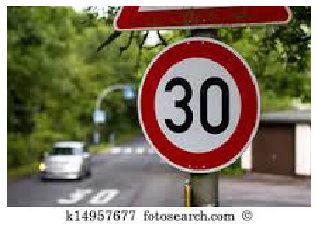

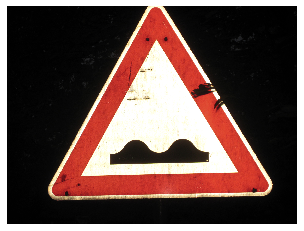

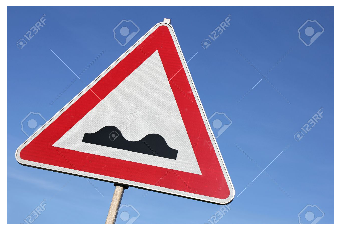

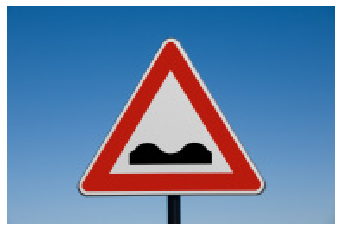

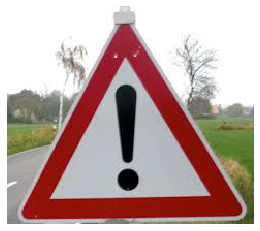

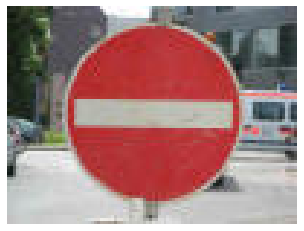

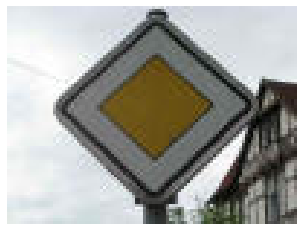

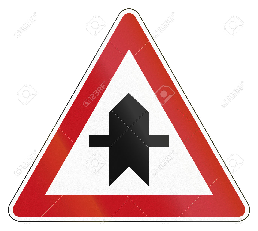

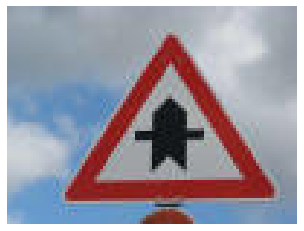

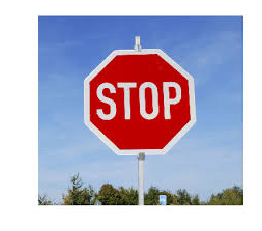

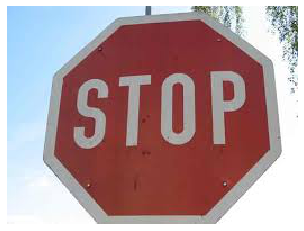

len new_signs_gray: 11
(32, 32, 1)


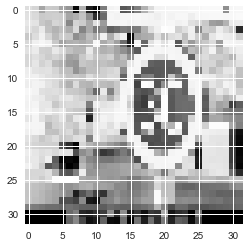

(32, 32, 1)


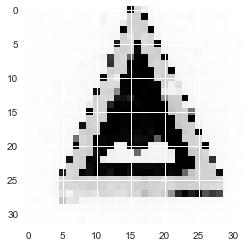

(32, 32, 1)


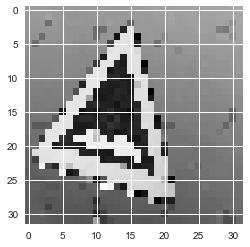

(32, 32, 1)


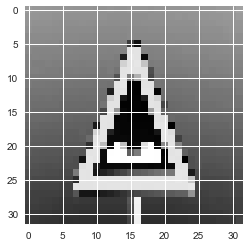

(32, 32, 1)


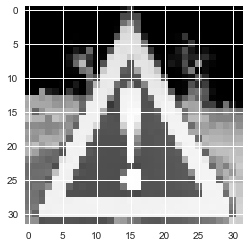

(32, 32, 1)


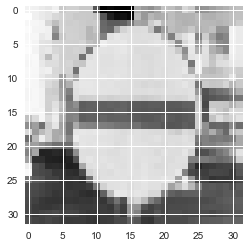

(32, 32, 1)


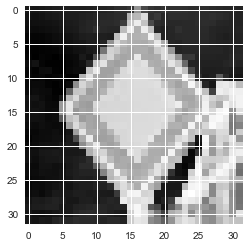

(32, 32, 1)


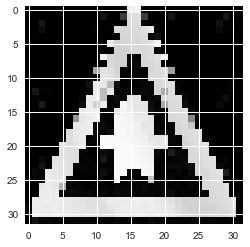

(32, 32, 1)


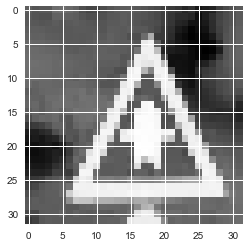

(32, 32, 1)


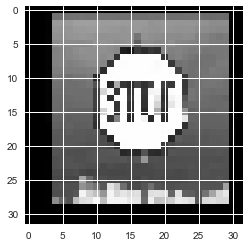

(32, 32, 1)


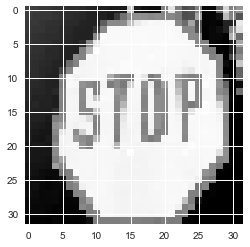

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
# Visualizations will be shown in the notebook.
%matplotlib inline

import glob
# jpg set
german_signs = glob.glob('./pictures/german-traffic-signs/jpg/*.jpg')
new_signs_label = np.array([1, 22, 22, 22, 18, 17, 12, 11, 11, 14, 14])

# svg png set
#german_signs = glob.glob('./pictures/german-traffic-signs/svg/*.png')
#new_signs_label = np.array([22, 28, 27, 12, 11, 23])

#german_signs = glob.glob('./pictures/german-traffic-signs/image-from-wikipedia/*.png')
for sign in german_signs:
    print(sign)

#new_signs_data = []
width = 32
height = 32
channel = 1
#new_signs_gray = np.ndarray( shape=(len(new_signs_label), width, height, channel) )
new_signs_gray = []

index = 0
for sign in german_signs:
#    print(sign)
    img = cv2.imread(sign)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
    gray = cv2.resize(gray, (32, 32) )
    fig = plt.imshow(img)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()
    gray = gray.reshape((32,32,1))
    new_signs_gray.append(gray)

new_signs_gray = np.array(new_signs_gray)
new_signs_normalized = (new_signs_gray - 128.0) / 128.0
#new_signs_normalized = new_signs_gray

print('len new_signs_gray:', len(new_signs_gray))
for norm in new_signs_normalized:
    print(norm.shape)
    norm = norm.reshape((32,32))
    plt.imshow(norm)
    plt.show()
    


### Predict the Sign Type for Each Image

time elapsed: 5.695271253585815
prediction:  [25 22 31 22 18 17 12 11 11 11 14]
Prediction of image index: 0 False
My model predicts:  ['25', 'Road work'] , the actual sign is:  ['1', 'Speed limit (30km/h)']


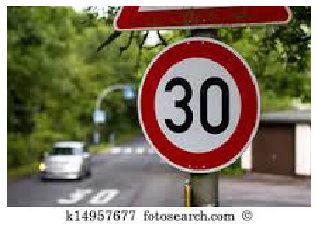

Prediction of image index: 1 True
My model predicts:  ['22', 'Bumpy road'] , the actual sign is:  ['22', 'Bumpy road']


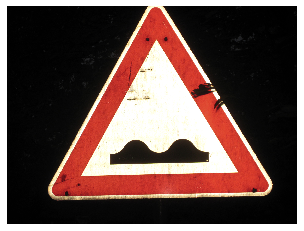

Prediction of image index: 2 False
My model predicts:  ['31', 'Wild animals crossing'] , the actual sign is:  ['22', 'Bumpy road']


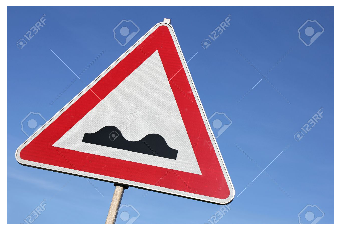

Prediction of image index: 3 True
My model predicts:  ['22', 'Bumpy road'] , the actual sign is:  ['22', 'Bumpy road']


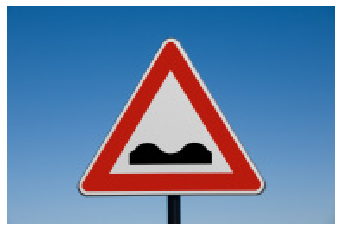

Prediction of image index: 4 True
My model predicts:  ['18', 'General caution'] , the actual sign is:  ['18', 'General caution']


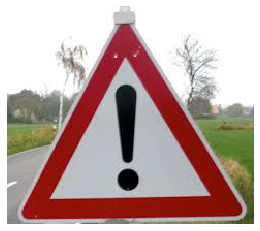

Prediction of image index: 5 True
My model predicts:  ['17', 'No entry'] , the actual sign is:  ['17', 'No entry']


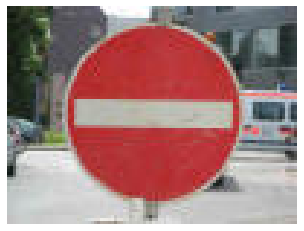

Prediction of image index: 6 True
My model predicts:  ['12', 'Priority road'] , the actual sign is:  ['12', 'Priority road']


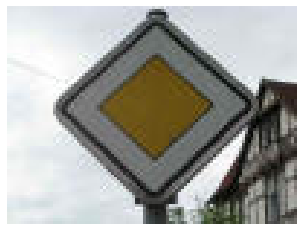

Prediction of image index: 7 True
My model predicts:  ['11', 'Right-of-way at the next intersection'] , the actual sign is:  ['11', 'Right-of-way at the next intersection']


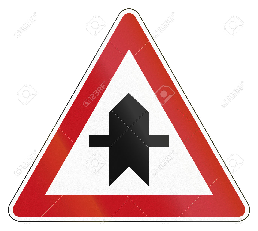

Prediction of image index: 8 True
My model predicts:  ['11', 'Right-of-way at the next intersection'] , the actual sign is:  ['11', 'Right-of-way at the next intersection']


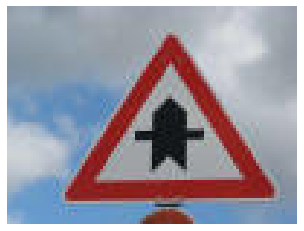

Prediction of image index: 9 False
My model predicts:  ['11', 'Right-of-way at the next intersection'] , the actual sign is:  ['14', 'Stop']


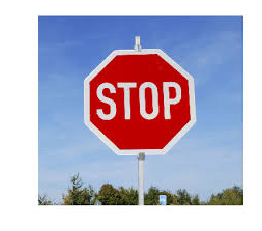

Prediction of image index: 10 True
My model predicts:  ['14', 'Stop'] , the actual sign is:  ['14', 'Stop']


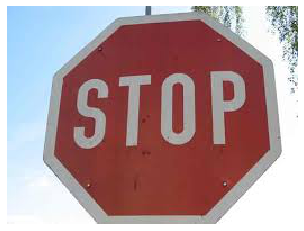

In [19]:
import time
time_start = time.time()

import tensorflow as tf
# self note: https://www.tensorflow.org/programmers_guide/variables
# still can't quite figure out how the saver.restore works but after hours trial and error it's working in this code anyway. :D
# don't need to use reset_default_graph() in my case. don't need latest_checkpoint either.
#tf.reset_default_graph()
sess=tf.Session()
#First let's load meta graph and restore weights
saver = tf.train.import_meta_graph('lenet.meta')
#saver.restore(sess,tf.train.latest_checkpoint('./'))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    prediction = sess.run(tf.argmax(logits, 1), feed_dict={x: new_signs_normalized, keep_prob: 1.0} )
#    print('new_signs shape:', new_signs.shape)
    
time_elapsed = time.time() - time_start
print('time elapsed:', time_elapsed)
print('prediction: ', prediction)

correct_cnt = 0
for index, item in enumerate(prediction):
    correct = sign_name_mapping[item] == sign_name_mapping[ new_signs_label[index] ]
    if correct:
        correct_cnt += 1
        
    print('Prediction of image index:', index, correct)
    print('My model predicts: ', sign_name_mapping[item], ', the actual sign is: ', sign_name_mapping[ new_signs_label[index] ])
    sign = german_signs[index]
    img = cv2.imread(sign)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.imshow(img)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()
    print

    

### Analyze Performance

In [20]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
import time
time_start = time.time()

accuracy_by_hand = correct_cnt / len(new_signs_normalized)
print('Accuracy by counting = ', accuracy_by_hand)

import tensorflow as tf
sess=tf.Session()    
saver = tf.train.import_meta_graph('lenet.meta')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    accuracy = evaluate(new_signs_normalized, new_signs_label)
    print("Accuracy by tensorflow = ", accuracy)
    
time_elapsed = time.time() - time_start
print('time elapsed:', time_elapsed)


Accuracy by counting =  0.7272727272727273
Accuracy by tensorflow =  0.727272748947
time elapsed: 5.835787296295166


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [21]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
kvalue = 5
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    topk = tf.nn.top_k(tf.nn.softmax(logits), k = kvalue)
    top = sess.run(topk, feed_dict = {x: new_signs_normalized, keep_prob: 1.0} )
    
print(top)


TopKV2(values=array([[  1.00000000e+00,   4.34344005e-10,   1.32767186e-10,
          2.03519558e-12,   1.16326133e-12],
       [  1.00000000e+00,   1.76477854e-12,   4.59346091e-18,
          4.23605635e-25,   2.24516984e-29],
       [  9.95035946e-01,   3.21711181e-03,   1.46141858e-03,
          2.62649002e-04,   1.22445954e-05],
       [  9.99998927e-01,   1.09437872e-06,   5.71687409e-08,
          3.94438594e-17,   8.68660825e-18],
       [  1.00000000e+00,   1.39039594e-25,   2.74682785e-26,
          5.66006040e-34,   8.17504664e-36],
       [  1.00000000e+00,   6.91655418e-38,   1.42932443e-43,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.24907904e-26,   1.99409592e-27,
          2.90636503e-28,   2.65723808e-30],
       [  1.00000000e+00,   1.80537975e-22,   1.35991062e-22,
          3.59624994e-23,   2.21833792e-27],
       [  1.00000000e+00,   1.20382824e-34,   1.15305483e-36,
          3.66914589e-40,   2.80259693e-45],
       [  9.99916553e-0

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [22]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")